In [1]:
from pcgen.molecular_extensions.paths import CKPT_DIR
from pcgen.molecular_extensions.utils import load_model_from_ckpt_path
from pcgen.molecular_extensions.data.datasets import MosesDataset
from rdkit import Chem
import torch
import numpy as np

In [2]:
# use GPU is cuda is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = load_model_from_ckpt_path(CKPT_DIR + '/checkpoint_moses.ckpt', map_location=device)

Found rdkit, all good
Marginal distribution of the classes: tensor([0.5664, 0.1071, 0.1283, 0.0812, 0.1115, 0.0042, 0.0012, 0.0000]) for nodes, tensor([8.4956e-01, 4.4773e-02, 5.9329e-02, 3.3361e-04, 4.6009e-02]) for edges


CCOC(=O)c1ncn2c1CN(C)C(=O)c1cc(F)ccc1-2


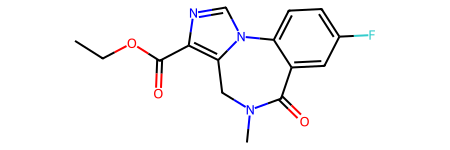

In [3]:
# load moses test set
dataset = MosesDataset(repr='mol')
#idx = 3
idx = 2
example = dataset[idx]
from pcgen.molecular_extensions.data.conversions import smiles_to_mol, mol_to_smiles
#example = smiles_to_mol("COC(=O)C(C1CCCCN1)C2=CC=CC=C2")
print(mol_to_smiles(example))
example

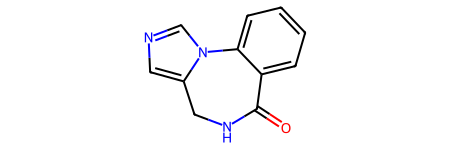

In [4]:
# extract Murcko scaffold
from pcgen.molecular_extensions.data.fragment_gen import extract_murcko_scaffold
from pcgen.molecular_extensions.data.fragment_gen import remove_atom
from rdkit.Chem import QED
scaffold = extract_murcko_scaffold(example)
#scaffold = smiles_to_mol("CCOC(=O)c1ncn2c1CN(C)C(=0)c1cc(F)ccc1-2")
#from rdkit.Chem import BRICS
#fragments = BRICS.BRICSDecompose(example)
#print(fragments)
#fragments = Chem.GetMolFrags(example, asMols=False, sanitizeFrags=True)
#scaffold = remove_atom(example)[0]
#scaffold = smiles_to_mol("OC(Cn1cncn1)c1ccc(F)cc1F")
scaffold

In [5]:
from pcgen.molecular_extensions.data.conversions import tuple_to_mol, mol_to_tuple
from pcgen.molecular_extensions.data.base import squeeze, subtract_arrays, count_atom_types
import torch
#left_over = subtract_arrays(mol_to_tuple(example)[0][0], mol_to_tuple(scaffold)[0][0])
samples = model.sample(num_samples=64, cond=(mol_to_tuple(scaffold), example.GetNumAtoms()))
#samples = model.sample(num_samples=128, cond=(squeeze((torch.cat([mol_to_tuple(scaffold)[0][0], left_over]), mol_to_tuple(scaffold)[1])), example.GetNumAtoms()))
#samples = model.sample(num_samples=128, cond=(squeeze((torch.cat([mol_to_tuple(scaffold)[0][0], left_over]), mol_to_tuple(scaffold)[1])), count_atom_types(example)))
#left_over[0]

KeyboardInterrupt: 

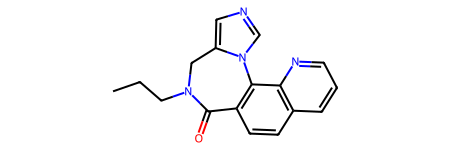

In [17]:
from pcgen.molecular_extensions.data.conversions import clean_and_convert_samples
cleaned_samples = clean_and_convert_samples(samples)
cleaned_samples[3]

In [12]:
from rdkit.Chem import Crippen

logPs = [Crippen.MolLogP(sample) for sample in cleaned_samples]
logPs

[0.4878,
 1.9165999999999996,
 2.7863000000000007,
 2.7863000000000016,
 3.316200000000002,
 3.4209000000000014,
 3.343700000000002,
 1.9484000000000001,
 1.5622,
 2.1018,
 1.7023,
 1.6195,
 1.8144,
 3.129900000000002,
 1.4864,
 2.606040000000001,
 0.27539999999999965,
 1.8638,
 1.8813,
 2.9704000000000015,
 -0.3500999999999994,
 2.14048,
 1.6492999999999995,
 3.5630000000000024,
 2.1256000000000004,
 1.3867,
 1.2124,
 2.5199000000000007,
 2.1107199999999997,
 -0.056000000000000494,
 2.1327,
 1.8169,
 2.2742000000000004,
 2.3349,
 2.9925400000000018,
 1.2148,
 2.2187,
 3.2993000000000023,
 2.2542999999999997,
 3.0283000000000015,
 3.0135200000000015,
 2.5971,
 1.8811199999999997,
 0.4343799999999997,
 1.9135999999999995,
 1.7011,
 1.3656000000000001,
 2.6740200000000014,
 1.619,
 2.14074,
 2.6320000000000006,
 1.7538,
 2.8995000000000015,
 1.6424999999999998,
 2.64562,
 2.9925400000000018,
 1.9436,
 2.815900000000001,
 2.768320000000001,
 3.480520000000002,
 3.0135200000000015,
 3.1673

(array([1., 0., 1., 0., 0., 0., 0., 6., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        5., 0., 0., 1., 0., 5., 5., 1., 0., 4., 5., 5., 8., 1., 0., 4., 5.,
        3., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 2.]),
 array([0.46986715, 0.47942358, 0.48898002, 0.49853645, 0.50809289,
        0.51764933, 0.52720576, 0.5367622 , 0.54631863, 0.55587507,
        0.5654315 , 0.57498794, 0.58454437, 0.59410081, 0.60365725,
        0.61321368, 0.62277012, 0.63232655, 0.64188299, 0.65143942,
        0.66099586, 0.67055229, 0.68010873, 0.68966517, 0.6992216 ,
        0.70877804, 0.71833447, 0.72789091, 0.73744734, 0.74700378,
        0.75656021, 0.76611665, 0.77567309, 0.78522952, 0.79478596,
        0.80434239, 0.81389883, 0.82345526, 0.8330117 , 0.84256813,
        0.85212457, 0.86168101, 0.87123744, 0.88079388, 0.89035031,
        0.89990675, 0.90946318, 0.91901962, 0.92857605, 0.93813249,
        0.94768893]),
 <BarContainer object of 50 artists>)

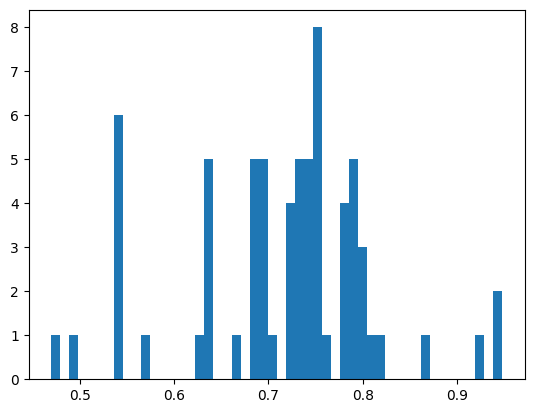

In [85]:
# compute histogram over SAS scores of generated examples
from rdkit.Chem import QED
qed_scores = [QED.qed(s) for s in cleaned_samples]
qed_scores = np.array(qed_scores)
import matplotlib.pyplot as plt
plt.hist(qed_scores, bins=50)

In [86]:
# QED of the ground truth example
QED.qed(example)

0.793247744649229

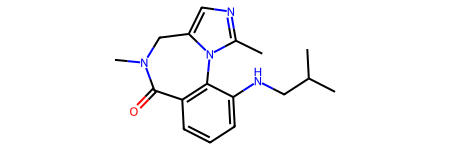

In [87]:
cleaned_samples[torch.argmax(torch.tensor(qed_scores))]

In [92]:
from pcgen.molecular_extensions.distances import TanimotoDistance
dist = TanimotoDistance(fingerprint="Morgan")
dists = [dist(sample, example) for sample in cleaned_samples]
dists
print(min(dists))
#cleaned_samples[dists.index(min(dists))]
#dist(scaffold, example)

0.6575342465753424


In [93]:
# extract k molecules with highest drug-likeliness
k = 10
sorted_indices = np.argsort(qed_scores)

# Get the top k indices (in descending order of x)
top_k_indices = sorted_indices[-k:][::-1]

# Get the corresponding values in y
top_k_samples = [cleaned_samples[idx] for idx in top_k_indices]

In [94]:
# compute similarity matrix between samples
similarity_matrix = np.zeros((len(top_k_samples), len(top_k_samples)))
for i in range(len(top_k_samples)):
    for j in range(len(top_k_samples)):
        similarity_matrix[i, j] = 1 - dist(top_k_samples[i], top_k_samples[j])

<Axes: >

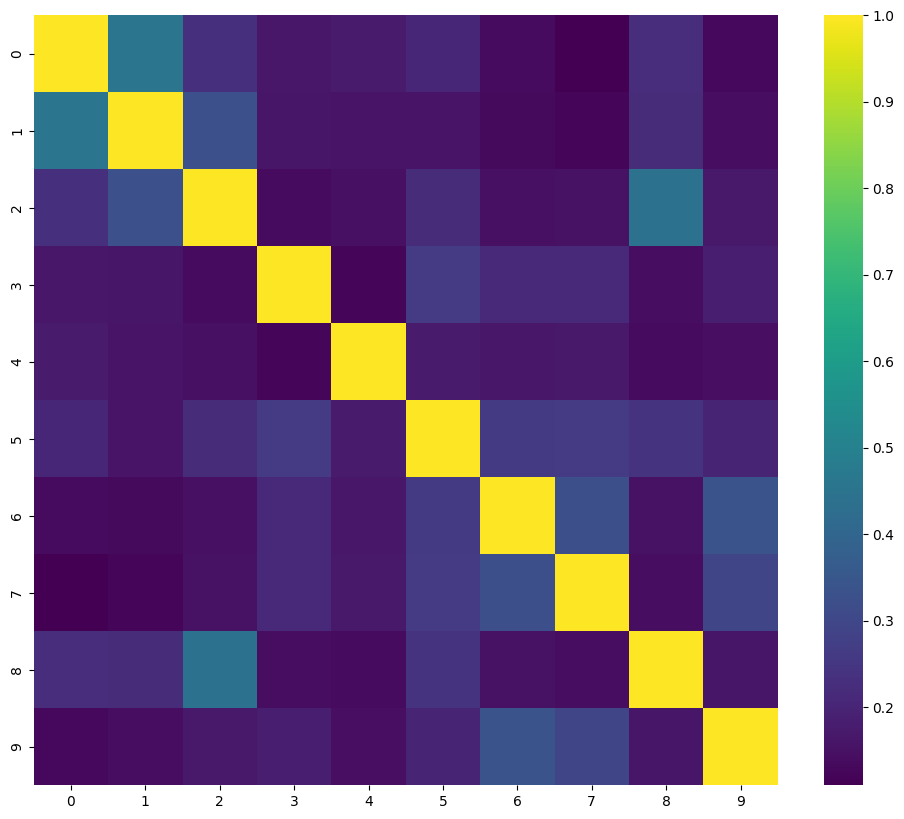

In [95]:
# create heatmap of similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, cmap='viridis', annot=False, fmt=".1f")